In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
crime_data = pd.read_csv('crime_dataset.csv')
crime_types = pd.read_csv('crime_types.csv')
weapon_types = pd.read_csv('weapon_types.csv')

In [ ]:
# just check dataset
crime_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,modus_operandi,victim_age,...,crime_code_1,crime_code_2,crime_code_3,crime_code_4,incident_admincode,location,cross_street,latitude,longitude,case_solved
0,211414090,2021-06-27,2021-06-20 20:00:00,14,Pacific,1464,1,480,0344,32.0,...,480.0,NaN,NaN,NaN,0,12400 FIELDING,NaN,33.9791,-118.4092,Not solved
1,210504861,2021-01-22,2021-01-21 22:00:00,5,Harbor,515,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,1500 BAY VIEW AV,NaN,33.7929,-118.2710,Solved
2,210104843,2021-01-21,2021-01-21 02:00:00,1,Central,139,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,1,300 S SANTA FE AV,NaN,34.0420,-118.2326,Solved
3,210115564,2021-08-22,2021-08-22 07:00:00,1,Central,151,1,350,1308 0344 0345 1822,29.0,...,350.0,NaN,NaN,NaN,0,7TH,FIGUEROA,34.0496,-118.2603,Not solved
4,211421187,2021-11-09,2021-11-07 19:00:00,14,Pacific,1465,1,510,NaN,0.0,...,510.0,NaN,NaN,NaN,0,5500 MESMER AV,NaN,33.9869,-118.4022,Not solved


In [ ]:
# checking first row dataset
crime_types.head()

,crime_code,crime_description
0,480,BIKE - STOLEN
1,510,VEHICLE - STOLEN
2,350,"THEFT, PERSON"
3,440,THEFT PLAIN - PETTY ($950 & UNDER)
4,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [ ]:
weapon_types.head()

,weapon_code,weapon_description
0,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
1,500,UNKNOWN WEAPON/OTHER WEAPON
2,102,HAND GUN
3,201,KNIFE WITH BLADE OVER 6 INCHES IN LENGTH
4,107,OTHER FIREARM


In [ ]:
# checking percentage null values on dataset
cd = crime_data.copy()
ct = crime_types.copy()
wt = weapon_types.copy()
print(cd.isna().sum()/cd.shape[0] * 100,'\n')
print(ct.isna().sum()/cd.shape[0] * 100,'\n')
print(wt.isna().sum())

division_number         0.000000
date_reported           0.000000
date_occurred           0.000000
area                    0.000000
area_name               0.000000
reporting_district      0.000000
part                    0.000000
crime_code              0.000000
modus_operandi         14.244494
victim_age              2.000108
victim_gender          13.653620
victim_ethnicity       13.654605
premise_code            0.001477
premise_description     0.045300
weapon_code            64.918829
crime_code_1            0.000985
crime_code_2           92.195540
crime_code_3           99.739523
crime_code_4           99.991137
incident_admincode      0.000000
location                0.000000
cross_street           82.433810
latitude                0.000000
longitude               0.000000
case_solved             0.000000
dtype: float64 

crime_code           0.0
crime_description    0.0
dtype: float64 

weapon_code           0
weapon_description    0
dtype: int64


In [ ]:
# selecting and droping colunm more then 50 per null value
null_columns = ['weapon_code', 'crime_code_2', 'crime_code_3', 'crime_code_4', 'cross_street']
cd.drop(null_columns, axis=1, inplace=True)

In [ ]:
print(cd.dtypes)

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
modus_operandi          object
victim_age             float64
victim_gender           object
victim_ethnicity        object
premise_code           float64
premise_description     object
crime_code_1           float64
incident_admincode       int64
location                object
latitude               float64
longitude              float64
case_solved             object
dtype: object


In [ ]:
# filling numcricall value with mean and categorical with NA
for col in cd.columns:
    if pd.api.types.is_numeric_dtype(cd[col]):
        mean_value = cd[col].mean()
        cd[col] = cd[col].fillna(mean_value)
    else:
        cd[col] = cd[col].fillna("NA")

In [ ]:
cd.isna().sum().sum()

np.int64(0)

In [ ]:
# taking out outliers using IQR
numeric_cols = cd.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = cd[col].quantile(0.25)
    Q3 = cd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cd = cd[(cd[col] >= lower_bound) & (cd[col] <= upper_bound)]

In [ ]:
cd.shape

(151700, 20)

In [ ]:
# droping duplicates
cd = cd.drop_duplicates()
cd.shape

(151700, 20)

In [ ]:
cd.dtypes

,0
division_number,int64
date_reported,object
date_occurred,object
area,int64
area_name,object
reporting_district,int64
part,int64
crime_code,int64
modus_operandi,object
victim_age,float64


In [ ]:
import seaborn as sns

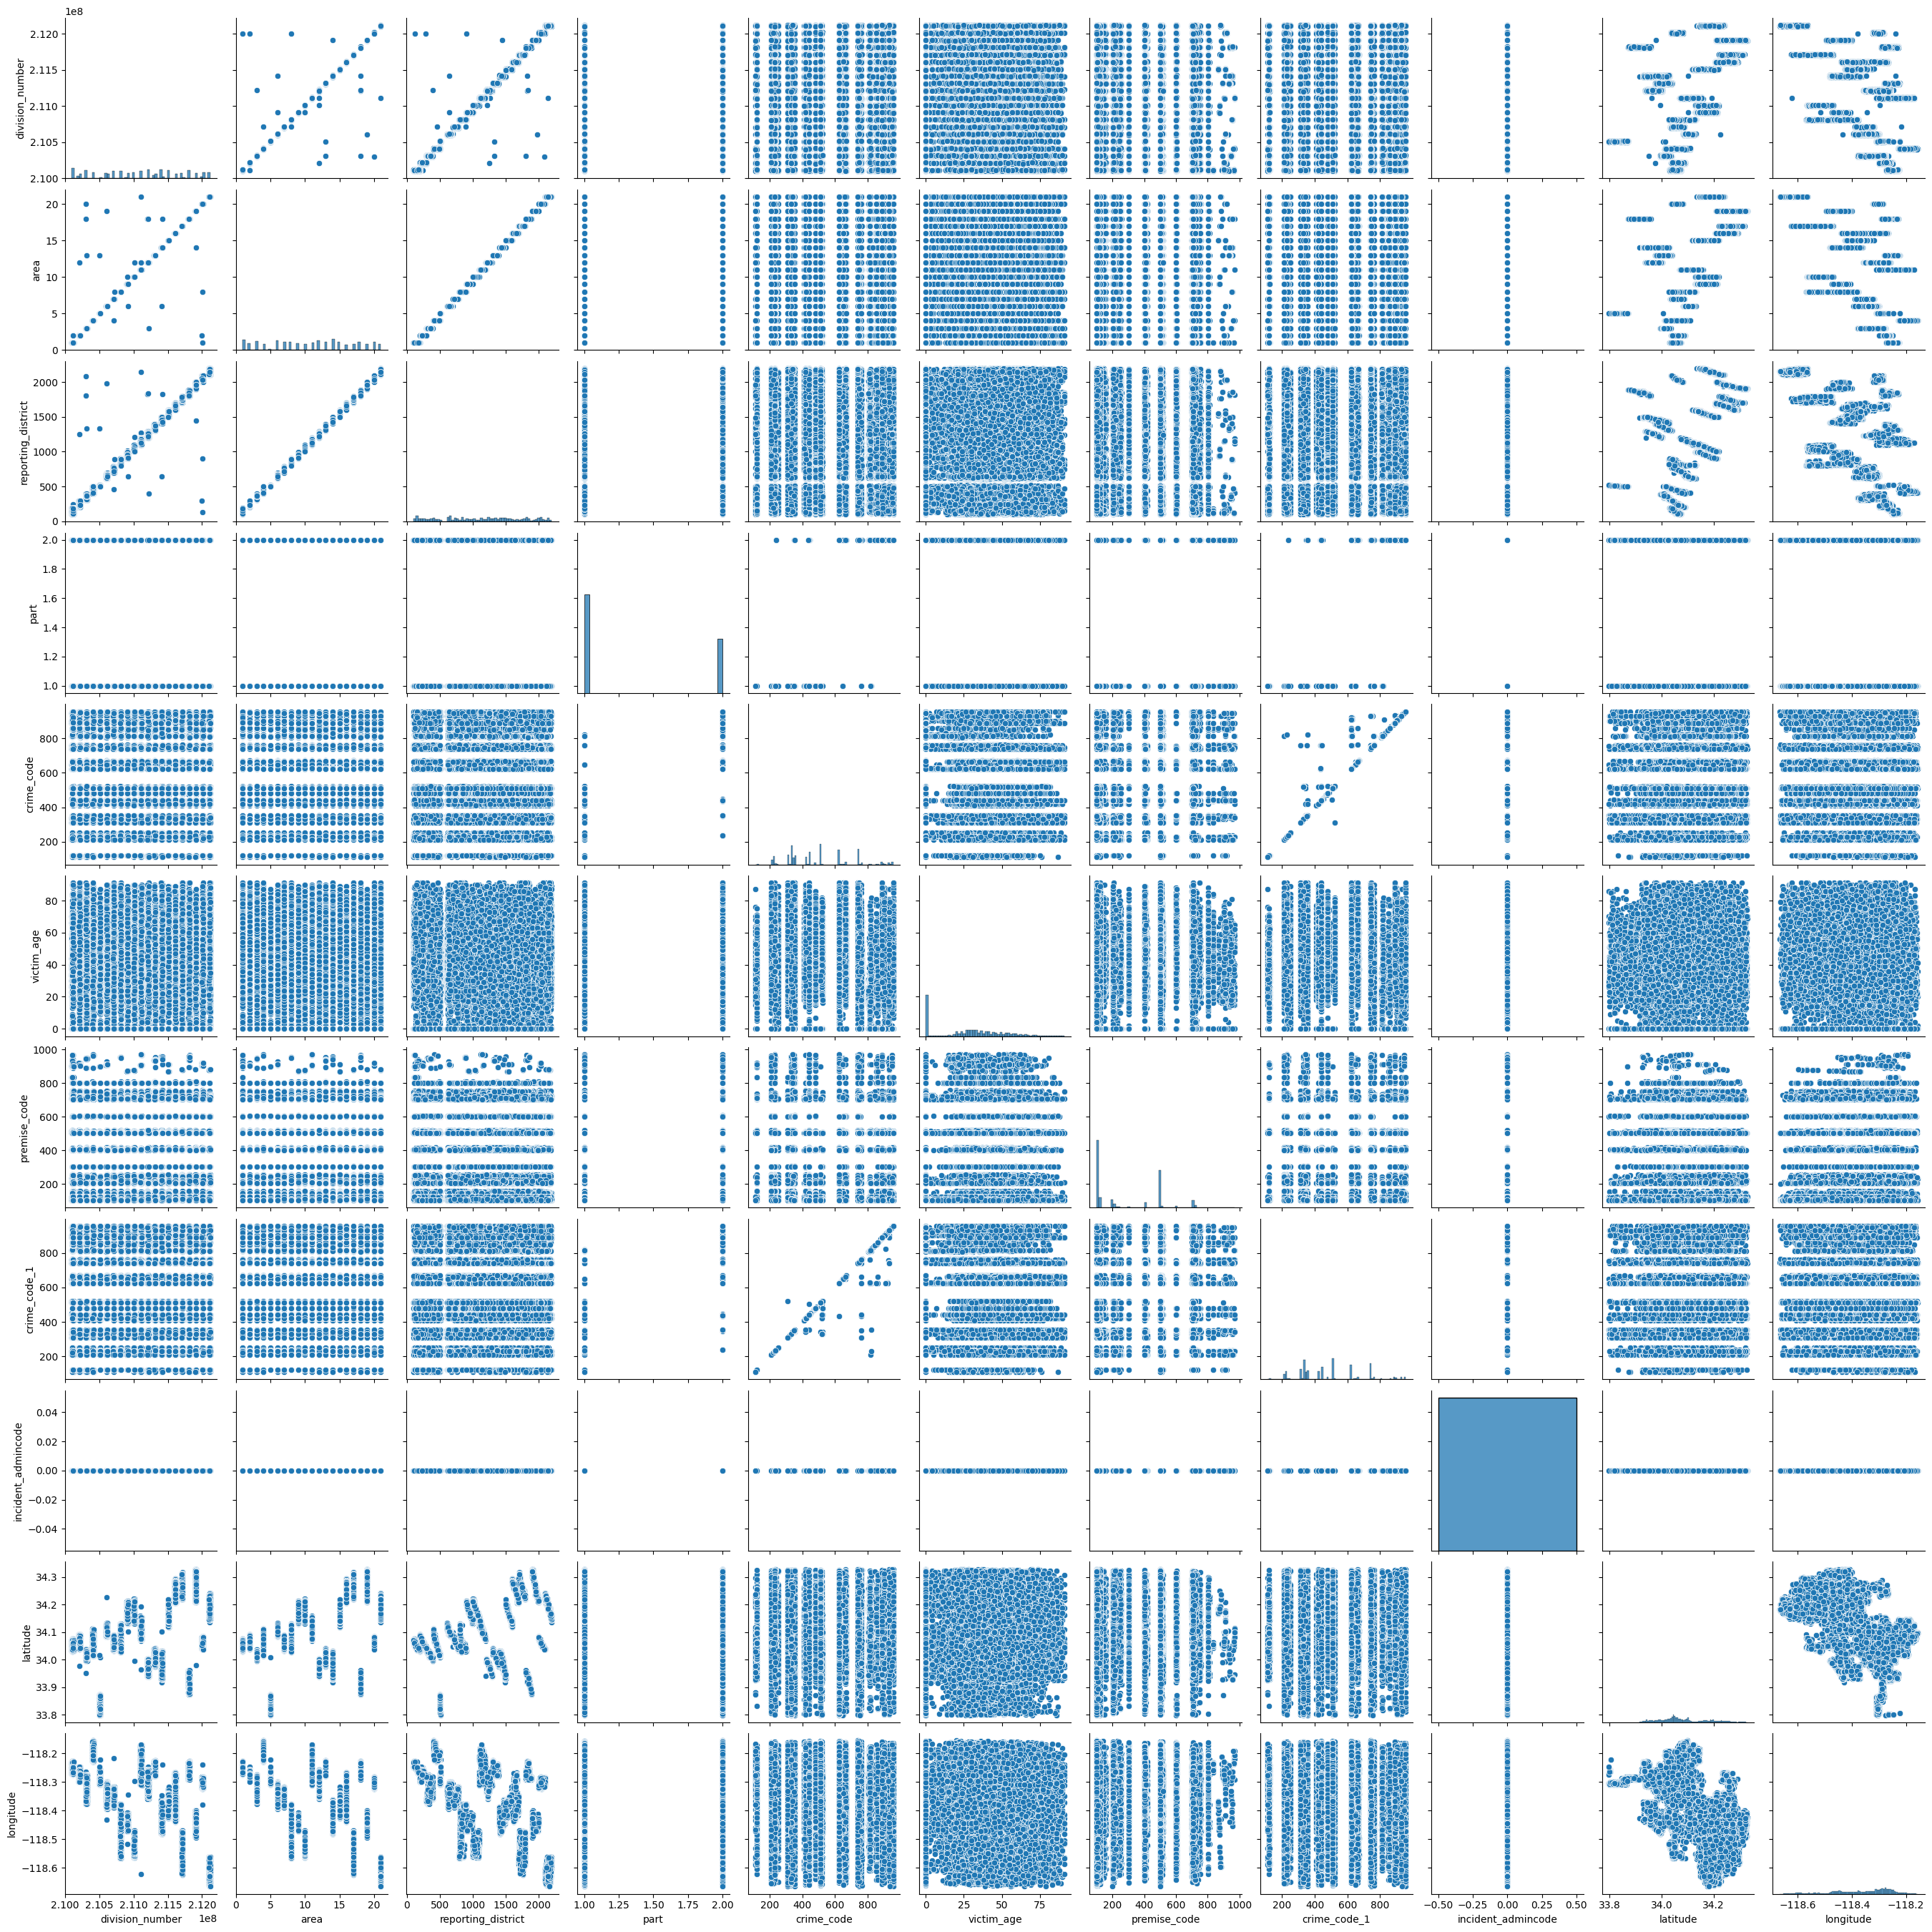

In [ ]:
# destributing variable
sns.pairplot(cd)

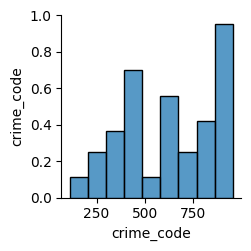

In [ ]:
# distribution crime code
sns.pairplot(ct)

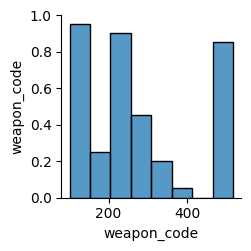

In [ ]:
# destribution weapon code
sns.pairplot(wt)

In [ ]:
cd.describe()

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,crime_code_1,incident_admincode,latitude,longitude
count,1.517000e+05,151700.000000,151700.000000,151700.000000,151700.000000,151700.000000,151700.000000,151700.000000,151700.0,151700.000000,151700.000000
mean,2.110997e+08,10.875999,1134.170112,1.353889,488.484087,29.128870,284.362216,488.302757,0.0,34.081803,-118.355740
std,6.043994e+05,6.045644,604.531264,0.478177,196.023439,21.857072,217.501416,195.867320,0.0,0.093595,0.103791
min,2.101000e+08,1.000000,101.000000,1.000000,110.000000,0.000000,101.000000,110.000000,0.0,33.798600,-118.666100
25%,2.106135e+08,6.000000,645.000000,1.000000,330.000000,0.000000,101.000000,330.000000,0.0,34.021000,-118.431200
50%,2.111145e+08,11.000000,1169.000000,1.000000,440.000000,30.000000,123.000000,440.000000,0.0,34.060800,-118.329700
75%,2.116059e+08,16.000000,1613.000000,2.000000,624.000000,44.000000,501.000000,624.000000,0.0,34.157600,-118.274500
max,2.121182e+08,21.000000,2199.000000,2.000000,956.000000,91.000000,971.000000,956.000000,0.0,34.329200,-118.155400


In [ ]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151700 entries, 0 to 203088
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   division_number      151700 non-null  int64  
 1   date_reported        151700 non-null  object 
 2   date_occurred        151700 non-null  object 
 3   area                 151700 non-null  int64  
 4   area_name            151700 non-null  object 
 5   reporting_district   151700 non-null  int64  
 6   part                 151700 non-null  int64  
 7   crime_code           151700 non-null  int64  
 8   modus_operandi       151700 non-null  object 
 9   victim_age           151700 non-null  float64
 10  victim_gender        151700 non-null  object 
 11  victim_ethnicity     151700 non-null  object 
 12  premise_code         151700 non-null  float64
 13  premise_description  151700 non-null  object 
 14  crime_code_1         151700 non-null  float64
 15  incident_admincode   1

In [ ]:
ct.describe()

,crime_code
count,133.000000
mean,628.270677
std,247.114656
min,110.000000
25%,437.000000
50%,653.000000
75%,865.000000
max,956.000000


In [ ]:
ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   crime_code         133 non-null    int64 
 1   crime_description  133 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [ ]:
wt.describe()

,weapon_code
count,73.000000
mean,273.561644
std,147.230072
min,101.000000
25%,125.000000
50%,217.000000
75%,312.000000
max,516.000000


In [ ]:
  wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   weapon_code         73 non-null     int64 
 1   weapon_description  73 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


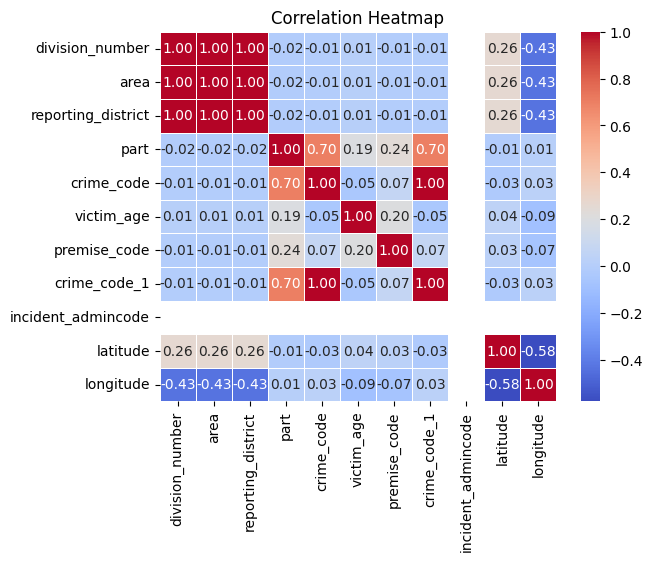

In [ ]:

# correlation matrix in the cd data frame
import seaborn as sns
import matplotlib.pyplot as plt
corr_cd = cd.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_cd, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
cd['date_reported'] = pd.to_datetime(cd['date_reported'], errors='coerce')
cd['date_occurred'] = pd.to_datetime(cd['date_occurred'], errors='coerce')

<Axes: title={'center': 'Monthly Crime Trend'}, xlabel='month'>

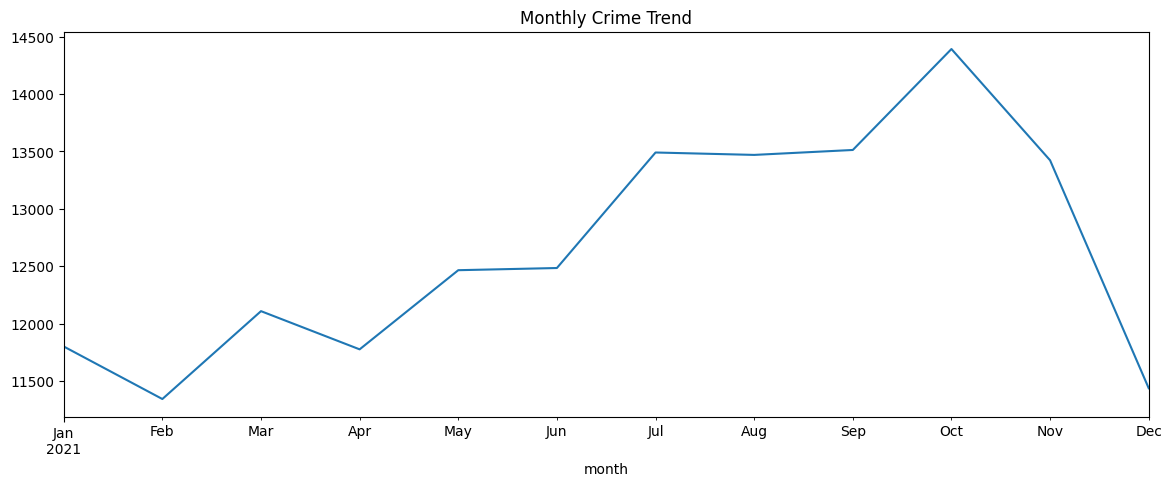

In [ ]:
# monthly crim trend
cd['year'] = cd['date_occurred'].dt.year
cd['month'] = cd['date_occurred'].dt.to_period('M')
cd.groupby('month').size().plot(figsize=(14,5), title='Monthly Crime Trend')

In [ ]:
cd.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'modus_operandi', 'victim_age', 'victim_gender', 'victim_ethnicity',
       'premise_code', 'premise_description', 'crime_code_1',
       'incident_admincode', 'location', 'latitude', 'longitude',
       'case_solved', 'year', 'month'],
      dtype='object')

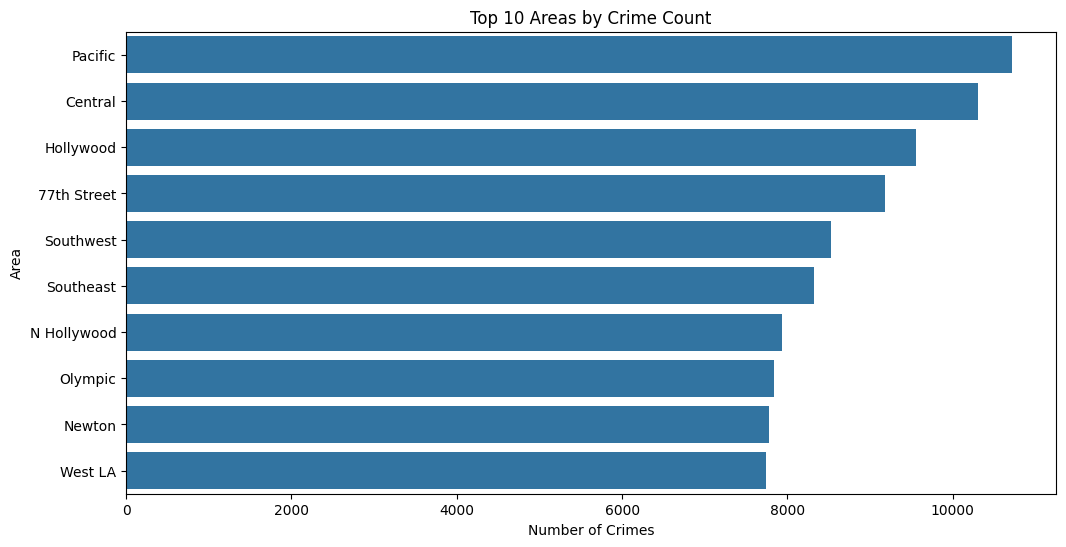

In [ ]:

# top 10 areas by crime count
area_counts = cd['area_name'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=area_counts.index[:10], x=area_counts.values[:10])
plt.title('Top 10 Areas by Crime Count')
plt.xlabel('Number of Crimes')
plt.ylabel('Area')
plt.show()

In [ ]:
solved = cd[cd.case_solved == 'Solved']
solved.shape

(429, 22)

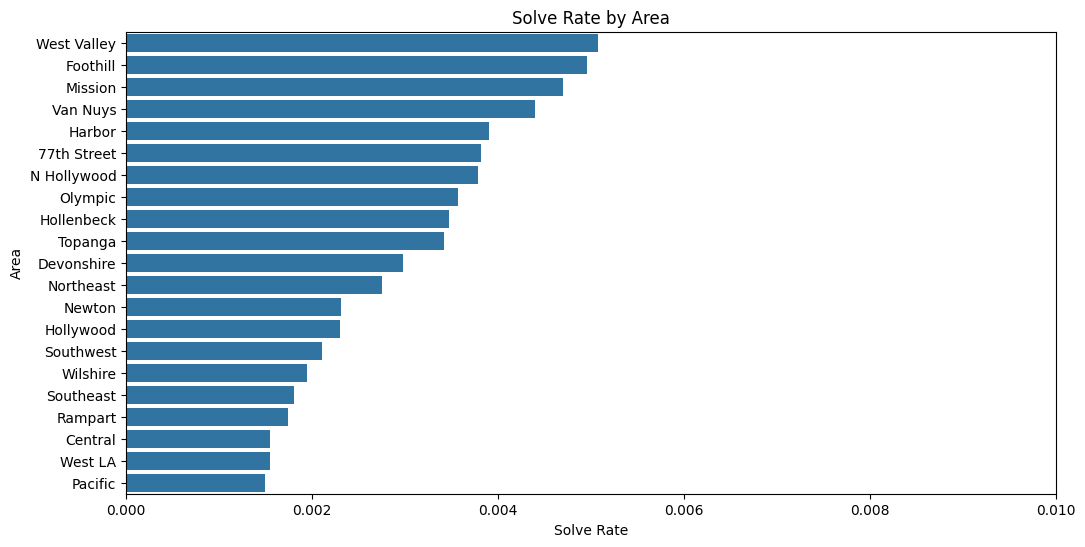

In [ ]:
# solve rate by area
solve_by_area = (
    cd.groupby('area_name')['case_solved']
    .apply(lambda x: (x == 'Solved').mean())
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=solve_by_area.values, y=solve_by_area.index)
plt.title('Solve Rate by Area')
plt.xlabel('Solve Rate')
plt.ylabel('Area')
plt.xlim(0, 0.01)
plt.show()


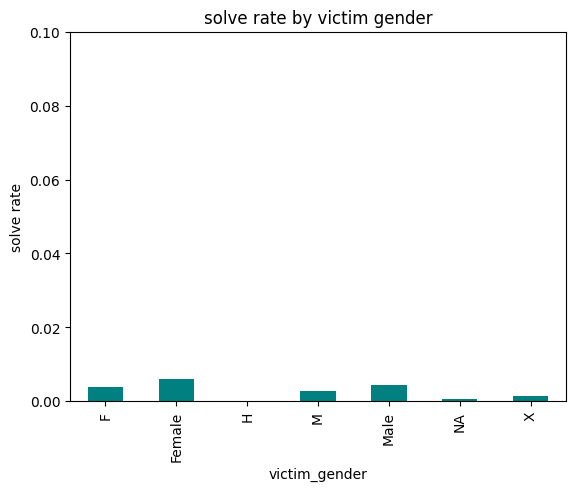

In [ ]:
# solve rate by gender
solve_by_gender = (
    cd.groupby('victim_gender')['case_solved']
    .apply(lambda x: (x == 'Solved').mean())
)
solve_by_gender.plot(kind='bar', title='solve rate by victim gender', color='teal')
plt.ylabel('solve rate')
plt.ylim(0, 0.1)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = cd.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
cd[numeric_cols] = scaler.fit_transform(cd[numeric_cols])


In [ ]:
cd.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'modus_operandi', 'victim_age', 'victim_gender', 'victim_ethnicity',
       'premise_code', 'premise_description', 'crime_code_1',
       'incident_admincode', 'location', 'latitude', 'longitude',
       'case_solved', 'year', 'month'],
      dtype='object')

In [ ]:
import pandas as pd
categorical_cols = [
    'area_name', 'victim_gender', 'victim_ethnicity',
    'premise_description', 'part', 'modus_operandi'
]
cd_encoded = pd.get_dummies(cd, columns=categorical_cols, drop_first=True)
cd_encoded.drop(['date_reported', 'date_occurred', 'location', 'incident_admincode'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
target = 'case_solved'
X = cd_encoded.drop(columns=[target])
y = cd_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=100)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
